In [59]:
import json
import matplotlib.pyplot as plt 
import pandas as pd
import pprint

In [60]:
data = pd.read_json("./output.json")
data.head()


,actual_x,actual_y,odometer_x,odometer_y,gps_x,gps_y,kf_x,kf_y,v
0,-3.721730,0.217014,-3.721732,0.217088,-3.641019,0.157918,-3.753927,0.201337,-0.000016
1,-3.721961,0.239709,-3.721776,0.244798,-3.717074,0.168090,-3.759875,0.218794,0.121536
2,-3.722368,0.294549,-3.721984,0.273242,-3.816540,0.315575,-3.742610,0.252878,0.121559
3,-3.723339,0.342985,-3.722280,0.299372,-3.695028,0.321975,-3.740920,0.299948,0.121540
4,-3.724777,0.397707,-3.722660,0.327565,-3.815184,0.497662,-3.727971,0.325023,0.121538


In [61]:
data['v'].describe()

count    249.000000
mean       0.120978
std        0.007736
min       -0.000016
25%        0.121540
50%        0.121545
75%        0.121550
max        0.122809
Name: v, dtype: float64

In [62]:
data['residual_x'] = data['odometer_x'] - data['actual_x']
data['residual_y'] = data['odometer_y'] - data['actual_y']
data['residual_abs'] = (data['residual_x']**2 + data['residual_y']**2)**.5
data.head()

,actual_x,actual_y,odometer_x,odometer_y,gps_x,gps_y,kf_x,kf_y,v,residual_x,residual_y,residual_abs
0,-3.721730,0.217014,-3.721732,0.217088,-3.641019,0.157918,-3.753927,0.201337,-0.000016,-0.000002,0.000074,0.000074
1,-3.721961,0.239709,-3.721776,0.244798,-3.717074,0.168090,-3.759875,0.218794,0.121536,0.000185,0.005089,0.005092
2,-3.722368,0.294549,-3.721984,0.273242,-3.816540,0.315575,-3.742610,0.252878,0.121559,0.000384,-0.021307,0.021311
3,-3.723339,0.342985,-3.722280,0.299372,-3.695028,0.321975,-3.740920,0.299948,0.121540,0.001059,-0.043613,0.043626
4,-3.724777,0.397707,-3.722660,0.327565,-3.815184,0.497662,-3.727971,0.325023,0.121538,0.002116,-0.070142,0.070174


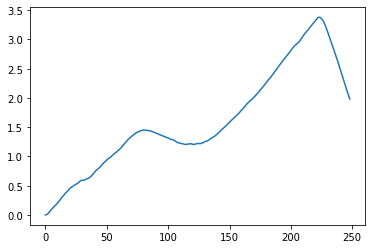

In [63]:
plt.plot(data['residual_abs'])

In [64]:
data['change_od_x'] = data['odometer_x'].diff()
data['change_od_y'] = data['odometer_y'].diff()
data['change_actual_x'] = data['actual_x'].diff()
data['change_actual_y'] = data['actual_y'].diff()
data['residual_x2'] = data['change_od_x'] - data['change_actual_x']
data['residual_y2'] = data['change_od_y'] - data['change_actual_y']
data['residual_abs2'] = (data['residual_x2']**2 + data['residual_y2']**2)**.5
data.head()

,actual_x,actual_y,odometer_x,odometer_y,gps_x,gps_y,kf_x,kf_y,v,residual_x,residual_y,residual_abs,change_od_x,change_od_y,change_actual_x,change_actual_y,residual_x2,residual_y2,residual_abs2
0,-3.721730,0.217014,-3.721732,0.217088,-3.641019,0.157918,-3.753927,0.201337,-0.000016,-0.000002,0.000074,0.000074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-3.721961,0.239709,-3.721776,0.244798,-3.717074,0.168090,-3.759875,0.218794,0.121536,0.000185,0.005089,0.005092,-0.000044,0.027710,-0.000231,0.022695,0.000187,0.005015,0.005018
2,-3.722368,0.294549,-3.721984,0.273242,-3.816540,0.315575,-3.742610,0.252878,0.121559,0.000384,-0.021307,0.021311,-0.000208,0.028444,-0.000407,0.054840,0.000199,-0.026396,0.026397
3,-3.723339,0.342985,-3.722280,0.299372,-3.695028,0.321975,-3.740920,0.299948,0.121540,0.001059,-0.043613,0.043626,-0.000296,0.026130,-0.000971,0.048436,0.000675,-0.022306,0.022316
4,-3.724777,0.397707,-3.722660,0.327565,-3.815184,0.497662,-3.727971,0.325023,0.121538,0.002116,-0.070142,0.070174,-0.000380,0.028194,-0.001437,0.054722,0.001057,-0.026528,0.026549


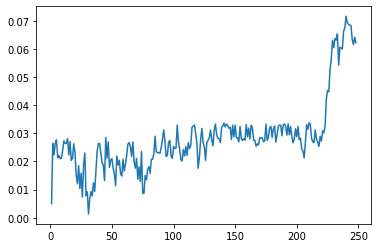

In [65]:
plt.plot(data['residual_abs2'])

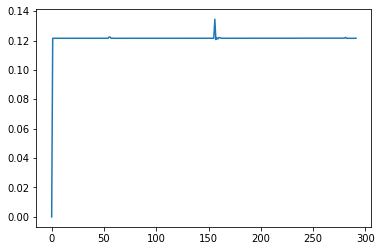

In [58]:
plt.plot(data['v'])